<a href="https://colab.research.google.com/github/aronnyberg/finance-scripts/blob/master/runBasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary imports and installs for colab
from datetime import datetime

!pip install --upgrade -q gspread

import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials
import time

from google.colab import drive
drive.mount('drive')

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'gspread'

In [ ]:
#grab the data you pulled from downloadBasks.ipynb, so update the name accordingly
data = pd.read_csv('/content/drive/My Drive/basks301221.csv')

: 

: 

: 

: 

: 

: 

In [ ]:
df = pd.DataFrame(data).groupby(['asset','exchange']).ask.mean()
df2 = df.unstack().T

: 

: 

: 

: 

: 

: 

In [ ]:
listofassets = []
#df2 = df2.loc[['FTX', 'BITMART']]
for each in df2.columns:
  # if relative differences are bigger than 5% we want to have a look
  try:
    diffs = abs((df2[each].max()-df2[each].min())/df2[each].min())
    if diffs > 0.05:
      print(diffs, df2[each])
      listofassets.append(each)
  except:
    pass

878.1312559017941 exchange
BINANCE     0.002787
BITFINEX         NaN
BITMART     0.002793
BITSTAMP         NaN
FTX              NaN
GATE.IO     0.000003
GEMINI           NaN
KRAKEN           NaN
PHEMEX           NaN
Name: BTT/USDT, dtype: float64
0.05537459283387619 exchange
BINANCE      NaN
BITFINEX     NaN
BITMART     9.21
BITSTAMP     NaN
FTX          NaN
GATE.IO     9.72
GEMINI       NaN
KRAKEN       NaN
PHEMEX       NaN
Name: EWT/USDT, dtype: float64
0.13646532438478728 exchange
BINANCE          NaN
BITFINEX         NaN
BITMART     0.000005
BITSTAMP         NaN
FTX              NaN
GATE.IO     0.000004
GEMINI           NaN
KRAKEN           NaN
PHEMEX           NaN
Name: REEF/ETH, dtype: float64
0.07097737452624331 exchange
BINANCE          NaN
BITFINEX    0.017414
BITMART          NaN
BITSTAMP         NaN
FTX         0.018650
GATE.IO          NaN
GEMINI           NaN
KRAKEN           NaN
PHEMEX           NaN
Name: REEF/USD, dtype: float64
0.15151699029126206 exchange
BINANCE     0

: 

: 

: 

: 

: 

: 

In [ ]:
#EWT/USDT had a substantial difference, let's have a quick check on the higher/lower between exchanges
df2['EWT/USDT']

exchange
BINANCE      NaN
BITFINEX     NaN
BITMART     9.21
BITSTAMP     NaN
FTX          NaN
GATE.IO     9.72
GEMINI       NaN
KRAKEN       NaN
PHEMEX       NaN
Name: EWT/USDT, dtype: float64

: 

: 

: 

: 

: 

: 

In [ ]:
#and the same for REEF/USD
df2['REEF/USD']

exchange
BINANCE          NaN
BITFINEX    0.017414
BITMART          NaN
BITSTAMP         NaN
FTX         0.018650
GATE.IO          NaN
GEMINI           NaN
KRAKEN           NaN
PHEMEX           NaN
Name: REEF/USD, dtype: float64

: 

: 

: 

: 

: 

: 

In [ ]:
#To investigate these two potentil arb opportunties let's get a picture of the history of both,
#have their respective price differentials been closer in the past?

#To do this we'll need to grab data on historic 1 hour price history
!pip install ccxt
import ccxt
binance = ccxt.binance () 
binance.load_markets ()
ftx = ccxt.ftx () 
ftx.load_markets ()
gemini = ccxt.gemini ()
gemini.load_markets ()
kraken = ccxt.kraken () 
kraken.load_markets ()
bitfinex = ccxt.bitfinex ()
bitfinex.load_markets ()
bitstamp = ccxt.bitstamp () 
bitstamp.load_markets ()
bitmart = ccxt.bitmart()
bitmart.load_markets()
gateio = ccxt.gateio()
gateio.load_markets()
phemex = ccxt.phemex()
phemex.load_markets()

def get_ohlcv(thepair, theexchange):
  ohlcv = theexchange.fetch_ohlcv(thepair, '1h')
  dates = [datetime.fromtimestamp (x[0] // 1000) for x in ohlcv]
  data = pd.DataFrame(ohlcv, index=dates)
  data['Asset'] = thepair
  data['Exchange'] = str(theexchange).upper()
  data = data.rename(columns={0:'Timestamp', 1:'Open', 2:'High', 3:'Low', 4:'Close', 5:'Volume'})
  return data

: 

: 

: 

: 

: 

: 

In [ ]:
#To investigate the differential in REEF/USD between FTX and Gate.IO we'll grab price history for both a
# USD and USDT denominator, as most exchanges are either/or. It's a fairly safe assumption that the REEF/USDT and
# REEF/USD on the same exchange would be very similar and so we don't need to worry to much about this indirect comparison
#between the two exchanges
df = pd.DataFrame()
for ticker in ['REEF/USDT', 'REEF/USD']:
  for exch in [ftx, gateio]:
    try:
      df = df.append(get_ohlcv(ticker, exch))
    except:
      pass
    time.sleep(0.25)

: 

: 

: 

: 

: 

: 

In [ ]:
df2 = df.reset_index().groupby(['Exchange', 'index']).Close.mean().unstack().T

: 

: 

: 

: 

: 

: 

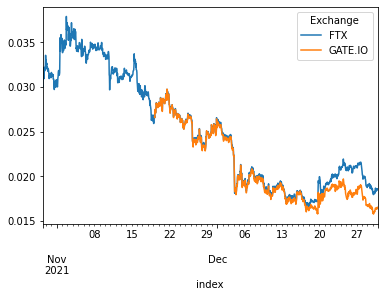

: 

: 

: 

: 

: 

: 

In [ ]:
#Looks like the differential is only recent and their is an there, at least for a time-horizon measured in weeks.
df2.plot()

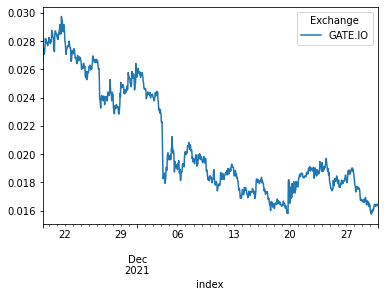

: 

: 

: 

: 

: 

: 

In [ ]:
df2.plot()

: 

: 

: 

: 

: 

: 